#Intro

This notebook focuses on loading an image, converting it to grayscale, applying noise reduction filters, and visualizing the resulting binarized version for further analysis.

Load the images and import the libraries

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

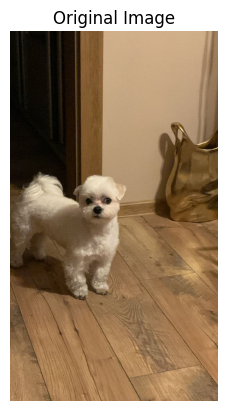

In [8]:
img = cv2.imread('/content/Pepe_picture.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.show()

#Grayscale, Gaussian Noise and Binarized version

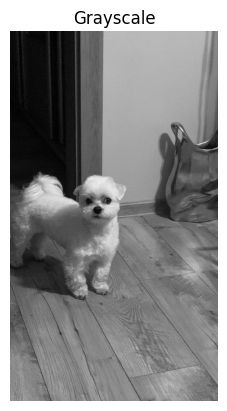

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")
plt.show()

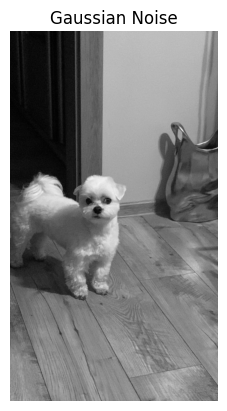

In [11]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blur, cmap='gray')
plt.title("Gaussian Noise")
plt.axis("off")
plt.show()

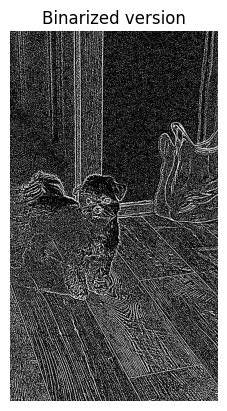

In [17]:
thresh = cv2.adaptiveThreshold(
    blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)
plt.imshow(thresh, cmap='gray')
plt.title("Binarized version")
plt.axis("off")
plt.show()

Mask main character

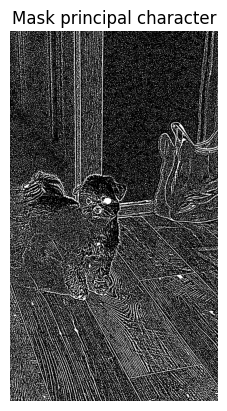

In [18]:
contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

mask = cv2.drawContours(
    np.zeros_like(thresh), contours, -1, 255, thickness=cv2.FILLED
)
plt.imshow(mask, cmap='gray')
plt.title("Mask main character")
plt.axis("off")
plt.show()


No very successfull, let's try a pretrained model `DeepLabV3 model` by PyTorch

# DeepLabV3 model

In [1]:
!pip install torch torchvision opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [11]:
import torch
from torchvision import models
from torchvision import transforms as T

import cv2
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

import os

Set ups

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.makedirs("outputs", exist_ok=True) #save outputs

Load and preprocess image

In [13]:
img = cv2.imread('/content/Pepe_picture.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_pil = Image.fromarray(img_rgb)

Preprocessing for DeepLab

In [14]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

input_tensor = transform(img_pil).unsqueeze(0).to(device)

Load pretrained model

In [15]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.to(device)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

Inference

In [16]:
with torch.no_grad():
    output = model(input_tensor)['out'][0]
    output_predictions = output.argmax(0).cpu().numpy()

In [17]:
#define target classes: dog (12), person (15)
#targets list: https://github.com/pytorch/vision/blob/main/references/segmentation/pascal_voc.py

target_classes = [12, 15]
mask = np.isin(output_predictions, target_classes).astype(np.uint8)

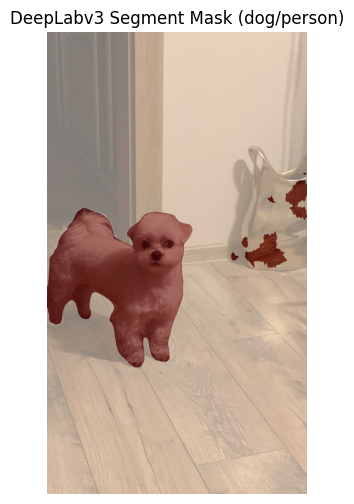

In [18]:
plt.figure(figsize=(4,6))
plt.imshow(img_rgb)
plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.title("DeepLabv3 Segment Mask (dog/person)")
plt.axis('off')
plt.show()

Find the largest component

In [19]:
#we only need the largest connected component from the mask
#in case of two objects in the picture not together

num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
if num_labels <= 1:
    raise Exception("No connected regions found.")


In [20]:
#Find the largest component (excluding background)

largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
largest_mask = (labels == largest_label).astype(np.uint8)

Extract bounding box and crop original image

In [21]:
x, y, w, h, area = stats[largest_label]
cropped_img = img_rgb[y:y+h, x:x+w]
cropped_mask = largest_mask[y:y+h, x:x+w] * 255

In [22]:
# Save the binary mask and cropped image
cv2.imwrite("outputs/character_mask.png", cropped_mask)
cv2.imwrite("outputs/character_crop.png", cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR))

True

(np.float64(-0.5), np.float64(644.5), np.float64(706.5), np.float64(-0.5))

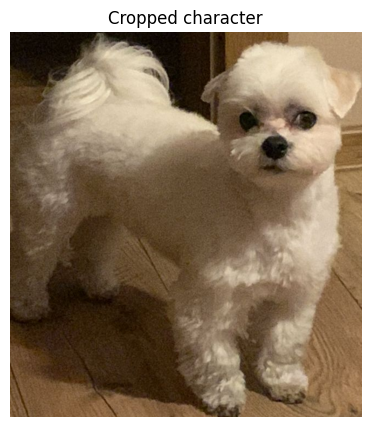

In [23]:
#Show preview
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cropped_img)
plt.title("Cropped character")
plt.axis("off")

(np.float64(-0.5), np.float64(644.5), np.float64(706.5), np.float64(-0.5))

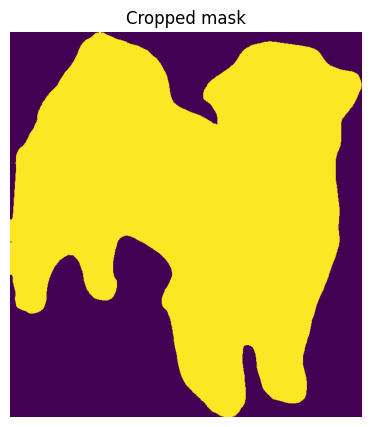

In [24]:
# # Show preview
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cropped_mask)
plt.title("Cropped mask")
plt.axis("off")

Apply grayscale, noise and binarized

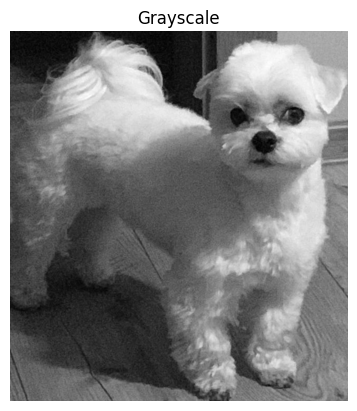

In [25]:
cropped_gray = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2GRAY)
plt.imshow(cropped_gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")
plt.show()

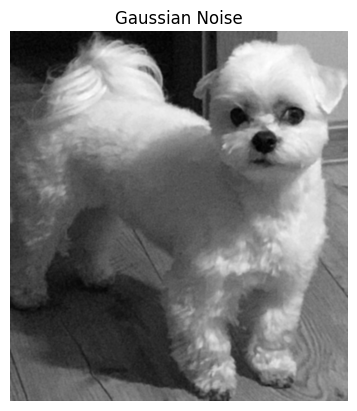

In [26]:
blurred_cropped = cv2.GaussianBlur(cropped_gray, (5, 5), 0)
plt.imshow(blurred_cropped, cmap='gray')
plt.title("Gaussian Noise")
plt.axis("off")
plt.show()

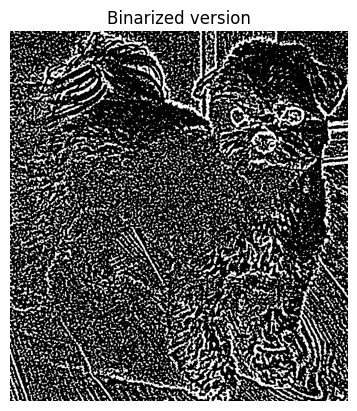

In [27]:
binary_cropped = cv2.adaptiveThreshold(
    blurred_cropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

plt.imshow(binary_cropped, cmap='gray')
plt.title("Binarized version")
plt.axis("off")
plt.show()

In [32]:
assert cropped_mask.shape == binary_cropped.shape, "Mask and binary image must have the same shape"

In [33]:
result = cv2.bitwise_and(cropped_mask, binary_cropped)

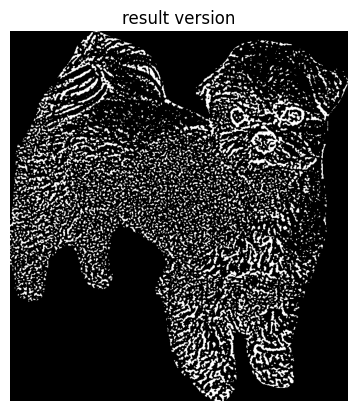

In [34]:
plt.imshow(result, cmap='gray')
plt.title("result version")
plt.axis("off")
plt.show()

#Making it a function

In [ ]:
import torch
import torchvision.transforms as T
from torchvision import models
import numpy as np
import cv2
from PIL import Image

In [69]:
def segment_and_crop_character(image_input, target_class, n_elements=1):
    """
    Segment and crop the largest object of a specific class in the image.

    Args:
        image_input (str or np.ndarray): Path to image or BGR image array.
        target_class (int): Class ID to extract (e.g., 12 = dog, 15 = person).

    Returns:
        binarized (np.ndarray): Grayscale binarized and blurred image [0-255].
        cropped_mask (np.ndarray): Binary mask [0, 255] of the cropped object.
        cropped_rgb (np.ndarray): RGB cropped image of the detected object.
    """

    #load image if path is provide
    if isinstance(image_input, str):
        img = cv2.imread(image_input)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_rgb = image_input.copy()

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)

    #Preprocess for DeepLabv3
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    input_tensor = transform(img_pil).unsqueeze(0)

    #Load model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = models.segmentation.deeplabv3_resnet101(pretrained=True)
    model.to(device)
    model.eval()

    input_tensor = input_tensor.to(device)

    #Inference
    with torch.no_grad():
        output = model(input_tensor)['out'][0]
        output_predictions = output.argmax(0).cpu().numpy()

    #Create binary mask for target class
    mask = np.isin(output_predictions, target_class).astype(np.uint8)

    #Find the largest component
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)

    #Skip background
    if num_labels <= 1:
        raise Exception("No connected regions found.")

    # Get areas and sort by size (exclude background at index 0)
    areas = stats[1:, cv2.CC_STAT_AREA]
    sorted_indices = np.argsort(areas)[::-1]
    largest_label = 1 + sorted_indices[0] #skip the background


    # Create final mask with top-n components
    final_mask = np.isin(labels, n_elements).astype(np.uint8)

    #Get bounding box around all selected components
    ys, xs = np.where(final_mask == 1)
    x, y, w, h = xs.min(), ys.min(), xs.max() - xs.min() + 1, ys.max() - ys.min() + 1

    # Crop regions
    cropped_rgb = img_rgb[y:y+h, x:x+w]
    cropped_mask = (final_mask[y:y+h, x:x+w] * 255).astype(np.uint8)

    # Convert to grayscale
    cropped_gray = cv2.cvtColor(cropped_rgb, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(cropped_gray, (5, 5), 0)

    #Binarized image
    binary_cropped = binary_cropped = cv2.adaptiveThreshold(
    blurred_cropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2)

    #Apply mask to binarized image
    result = cv2.bitwise_and(cropped_mask, binary_cropped)

    return result, cropped_mask, cropped_rgb


In [72]:
pepe_path = "/content/Pepe_picture.jpg"

In [74]:
binarized_img, mask_img, cropped_img = segment_and_crop_character(pepe_path, target_class=12)
#ejecution time: 98.246 s

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


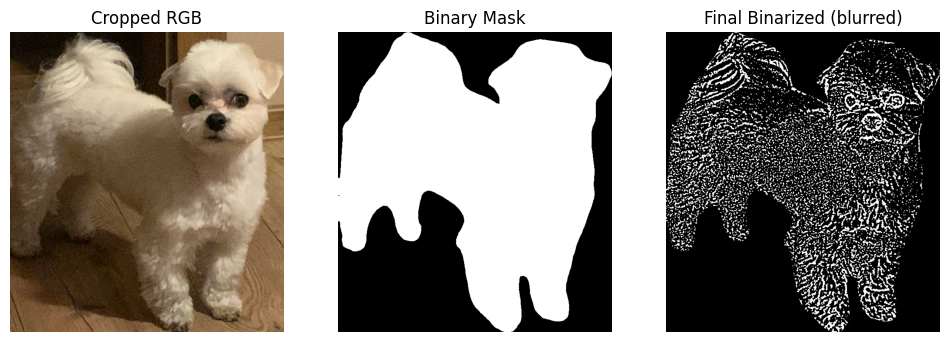

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(cropped_img)
plt.title("Cropped RGB")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask_img, cmap='gray')
plt.title("Binary Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(binarized_img, cmap='gray')
plt.title("Final Binarized (blurred)")
plt.axis("off")
plt.show()

Using Otsu

    _, binary_cropped = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

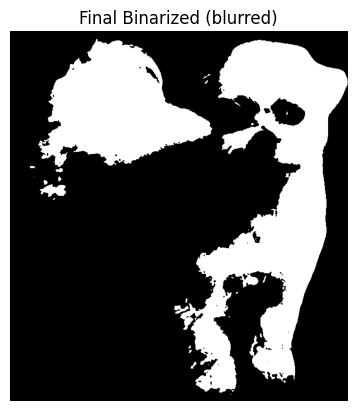

In [44]:
plt.imshow(binarized_img, cmap='gray')
plt.title("Final Binarized (blurred)")
plt.axis("off")
plt.show()

Using adaptiveThreshold

     binary_cropped = cv2.adaptiveThreshold(
        blurred_cropped, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        11, 2
    )

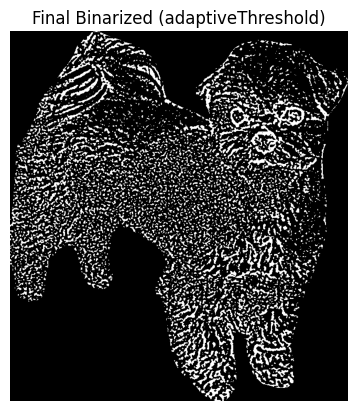

In [75]:
plt.imshow(binarized_img, cmap='gray')
plt.title("Final Binarized (adaptiveThreshold)")
plt.axis("off")
plt.show()

In [77]:
import cv2

cv2.imwrite("outputs/character_result.png", binarized_img)

True

Lighter model

In [64]:
def segment_and_crop_character_light(image_input, target_class, n_elements=1):
    """
    Segment and crop the largest object of a specific class in the image.

    Args:
        image_input (str or np.ndarray): Path to image or BGR image array.
        target_class (int): Class ID to extract (e.g., 12 = dog, 15 = person).

    Returns:
        binarized (np.ndarray): Grayscale binarized and blurred image [0-255].
        cropped_mask (np.ndarray): Binary mask [0, 255] of the cropped object.
        cropped_rgb (np.ndarray): RGB cropped image of the detected object.
    """

    #load image if path is provide
    if isinstance(image_input, str):
        img = cv2.imread(image_input)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_rgb = image_input.copy()

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)

    #Preprocess for DeepLabv3
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    input_tensor = transform(img_pil).unsqueeze(0)

    #Load model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model =  models.segmentation.fcn_resnet50(pretrained=True)
    #lighter model

    model.to(device)
    model.eval()

    input_tensor = input_tensor.to(device)

    #Inference
    with torch.no_grad():
        output = model(input_tensor)['out'][0]
        output_predictions = output.argmax(0).cpu().numpy()

    #Create binary mask for target class
    mask = np.isin(output_predictions, target_class).astype(np.uint8)

    #Find the largest component
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)

    #Skip background
    if num_labels <= 1:
        raise Exception("No connected regions found.")

    # Get areas and sort by size (exclude background at index 0)
    areas = stats[1:, cv2.CC_STAT_AREA]
    sorted_indices = np.argsort(areas)[::-1]
    largest_label = 1 + sorted_indices[0] #skip the background


    # Create final mask with top-n components
    final_mask = np.isin(labels, n_elements).astype(np.uint8)

    #Get bounding box around all selected components
    ys, xs = np.where(final_mask == 1)
    x, y, w, h = xs.min(), ys.min(), xs.max() - xs.min() + 1, ys.max() - ys.min() + 1

    # Crop regions
    cropped_rgb = img_rgb[y:y+h, x:x+w]
    cropped_mask = (final_mask[y:y+h, x:x+w] * 255).astype(np.uint8)

    # Convert to grayscale
    cropped_gray = cv2.cvtColor(cropped_rgb, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(cropped_gray, (5, 5), 0)

    #Binarized image
    binary_cropped = binary_cropped = cv2.adaptiveThreshold(
    blurred_cropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2)

    #Apply mask to binarized image
    if cropped_mask.shape != binary_cropped.shape:
      binary_cropped = cv2.resize(binary_cropped, (cropped_mask.shape[1], cropped_mask.shape[0]))

    result = cv2.bitwise_and(cropped_mask, binary_cropped)

    return result, cropped_mask, cropped_rgb


In [65]:
pepe_path = "/content/Pepe_picture.jpg"

In [66]:
binarized_img, mask_img, cropped_img = segment_and_crop_character_light(pepe_path, target_class=12)

#deeplabv3_mobilenet_v3_large
#ejecution time: 7.133 s

#fcn_resnet50
#ejecution time: 53,775 s

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:01<00:00, 141MB/s]


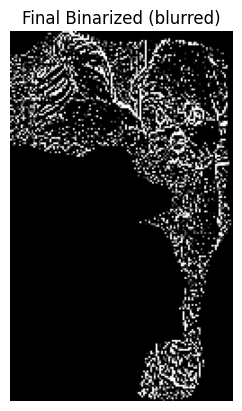

In [58]:
plt.imshow(binarized_img, cmap='gray')
plt.title("Final Binarized (blurred)")
plt.axis("off")
plt.show()

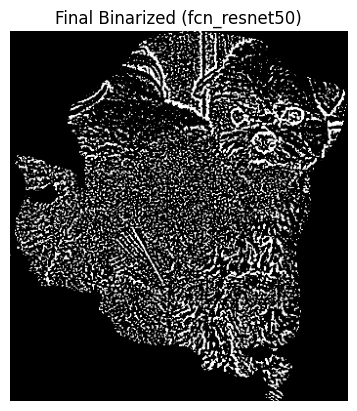

In [68]:
plt.imshow(binarized_img, cmap='gray')
plt.title("Final Binarized (fcn_resnet50)")
plt.axis("off")
plt.show()